A long, long time back, I had downloaded a copy of my facebook data, which included information on all the posts I had written over the years, all of the comments I'd written and things I liked. More recently, similar to the other pet projects I am working on, I wanted to look at basic statistics of my activity on facebook, like on what day of the week am I most active or what time of the day and so on. If you're interested in downloading the data that Facebook has on you, go [here](https://www.facebook.com/settings) and click on "Download a copy of your Facebook data". Once you've downloaded it, you will find a .htm file titled 'wall.htm'. If you don't know already, what you're reading is a Jupyter Notebook. If you don't have it installed, you can still print the relevant stats and make plots by running the python code that can be found [here](https://github.com/rahulporuri/peepees/blob/master/get_fb_stats.py)

Also, I use the [BeautifulSoup](www.crummy.com/software/BeautifulSoup/bs4/doc/) python library to parse the .htm file.

In [1]:
import numpy
import BeautifulSoup
import time

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

if you look at the `wall.htm` file, you will understand the structure of the file and the information it contains, such as information regarding the timestamps pertaining to posts, comments are. They are the `string` attribute of the `div` elements in the htm file.

the `wall.htm` might not look clean if you open it up on a text editor. If you're interested, you can use 
BeautifulSoup to prettify the output using
`print(soup.prettify())`

In [3]:
soup = BeautifulSoup.BeautifulSoup(open('wall.htm'))
allAttrs = [[tag.attrs, tag.string] for tag in soup.findAll('div')]

what we did above was to take the html soup and used the BeautifulSoup
library to look for all of the `<div></div>` html tags in it. Once 
BeautifulSoup found those html tags, we asked it to create a 2D list
containing the attributes of the tag i.e `class="meta"` or `"comment"` 
and the string between the html tags.

See below for how a part of the soup/html file looks like.

<p>
 <div class="meta">
  Monday, January 11, 2016 at 1:13am UTC+05:30
 </div>
 Rahul Poruri shared Lunarbaboon&#039;s photo.
</p>
<p>
 <div class="meta">
  Sunday, January 10, 2016 at 6:32pm UTC+05:30
 </div>
 Rahul Poruri shared a link.
</p>

the attribute `u'meta'` corresponds to the timestamps of any and every activity on my wall. the attribute `u'comment'` corresponds to comments. Blindly getting `tag.string` values will add noise to our timestamp dataset so we check to make sure that the attribute is `u'meta'` before we add the string/timestamp. Below, we simply collect all such time stamps into the list `dates`.

In [4]:
allAttrs[20]

[[(u'class', u'meta')], u'Sunday, December 6, 2015 at 10:14am UTC+05:30']

In [5]:
str(allAttrs[20][1])

'Sunday, December 6, 2015 at 10:14am UTC+05:30'

The structure of each element in `allAttrs` and our need to check for the `tag.attrs` to be `u'meta'` is the reason why you see `string[0][0][1]` in the `if` statement. And, as you can see sbove, the second element of each element in `allAttrs` contains the timestamps that we want to extract.

In [6]:
dates = []
for string in allAttrs:
    try :
        if string[0][0][1] == u'meta':
            try :
                dates.append(str(string[1]).split())
                """ str(string[1]) first converts the unicode string into an ascii string.
                the .split() method then splits the original string into smaller strings.
                """
            except TypeError :
                print string
    except IndexError:
        pass

print len(dates)

2367


how the string/time stamps look
--------------------------------

In [7]:
dates[:10]

[['Monday,', 'January', '11,', '2016', 'at', '1:13am', 'UTC+05:30'],
 ['Sunday,', 'January', '10,', '2016', 'at', '6:32pm', 'UTC+05:30'],
 ['Sunday,', 'January', '10,', '2016', 'at', '5:53pm', 'UTC+05:30'],
 ['Saturday,', 'January', '9,', '2016', 'at', '5:24pm', 'UTC+05:30'],
 ['Friday,', 'January', '1,', '2016', 'at', '9:51pm', 'UTC+05:30'],
 ['Thursday,', 'December', '31,', '2015', 'at', '7:40pm', 'UTC+05:30'],
 ['Sunday,', 'December', '27,', '2015', 'at', '10:46am', 'UTC+05:30'],
 ['Friday,', 'December', '25,', '2015', 'at', '6:29pm', 'UTC+05:30'],
 ['Friday,', 'December', '25,', '2015', 'at', '6:24pm', 'UTC+05:30'],
 ['Tuesday,', 'December', '22,', '2015', 'at', '8:30am', 'UTC+05:30']]

In [8]:
dayList = []
dateList = []
monthList = []
yearList = []

for string in dates:
    try:
        """ note that the zeroth element in each element of dates
        is the day. the first is the month. the second is the date.
        the third is the year and the fifth is the time of the day.
        """
        dayList.append(string[0].strip(','))
        dateList.append(int(string[2].strip(',')))
        monthList.append(string[1])
        yearList.append(int(string[3]))
    except IndexError:
        print string

In [9]:
timeList = []

for string in dates:
    try:
        """ getting the time information out of the individual elements 
        in dates is harder than it was to get the date/day information.
        this is because we have the am/pm suffixes and it would simply be 
        easier if we had 0-23 hr notation. Which is what we do here.
        """
        if string[5][-2] == 'a':
            """ if the second-to-last element of the string containing the
            time stamp is 'a', split the string using the ':' character as 
            the seperator and save the first value. Otherwise, add 12 to 
            the value and save.
            """
            if int(string[5].split(':')[0]) == 12:
                timeList.append(0)
            else:
                timeList.append(int(string[5].split(':')[0]))
        else:
            if int(string[5].split(':')[0]) == 12:
                timeList.append(int(string[5].split(':')[0]))
            else:  
                timeList.append(int(string[5].split(':')[0]) + 12)
    except IndexError:
        print string

from the numerous lists, we create a dictionary that tells us how many of each day/date/month/year are present in the list.

In [10]:
dayListDict = dict((x, dayList.count(x)) for x in dayList)
dateListDict = dict((x, dateList.count(x)) for x in dateList)
monthListDict = dict((x, monthList.count(x)) for x in monthList)
yearListDict = dict((x, yearList.count(x)) for x in yearList)
timeListDict = dict((x, timeList.count(x)) for x in timeList)

In [11]:
print dayListDict['Monday'], dayListDict['Tuesday'], dayListDict['Wednesday']
print dayListDict['Thursday'], dayListDict['Friday'], dayListDict['Saturday'], dayListDict['Sunday']

347 348 361
297 339 278 397


As you can see above, my activity has peaks on a sunday, as expected, but surprisingly, it has a low on a saturday.

In [12]:
print monthListDict['January'], monthListDict['February'], monthListDict['March'], monthListDict['April']
print monthListDict['May'], monthListDict['June'], monthListDict['July'], monthListDict['August']
print monthListDict['September'], monthListDict['October'], monthListDict['November'], monthListDict['December']

122 422 183 115
166 219 183 144
247 220 115 231


As you can see, I am the most active in February. And this is not without reason. For those of you who know me, my birthday is on February the 2nd so that anamoly is justified because of the birthday wishes.

Otherwise, as you can see, after a low in April, which is when the end semester exams for the even semester occur, my activity peaks in June, in the middle of the summer, and then drops till the beginning of the odd semester in August, followed by a high in September, another low in November, which is when the end semester exams for the odd semester occur and ending with a high in December.

In [13]:
yearListDict

{2009: 51,
 2010: 225,
 2011: 474,
 2012: 495,
 2013: 661,
 2014: 252,
 2015: 204,
 2016: 5}

As you can see, it looks like I joined facebook in 2009, which is also when I joined IIT Madras. My activity kept growing till 2013, which is when it peaked and then dropped off drastically in 2014, 2015. And there's a good enough reason for that as well. 2013 is when most of my batchmates and the people I hung out with graduated.

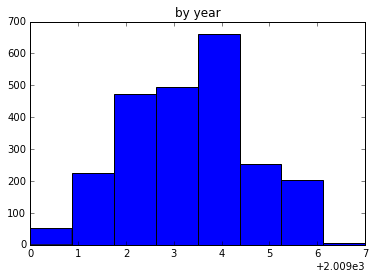

In [14]:
plt.hist([int(item) for item in yearList], bins=8)
plt.title('by year')

I'm lazy so I couldn't be bothered to add proper bin labels at the bottom of the plot above, which starts from the bin corresponding to 2009 at the left and ends with the bin for 2015 at the right.

In [15]:
timeListDict

{0: 80,
 1: 72,
 2: 41,
 3: 24,
 4: 30,
 5: 53,
 6: 65,
 7: 55,
 8: 46,
 9: 79,
 10: 86,
 11: 102,
 12: 209,
 13: 98,
 14: 106,
 15: 100,
 16: 144,
 17: 111,
 18: 182,
 19: 152,
 20: 121,
 21: 131,
 22: 113,
 23: 167}

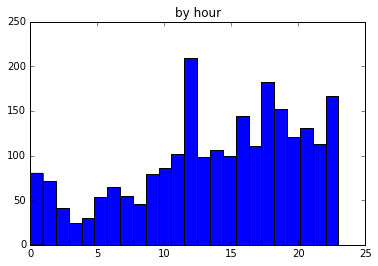

In [16]:
plt.hist([int(item) for item in timeList], bins=24)
plt.title('by hour')

As expected, my activity has an initial peak at around 6/7 AM in the morning, which then dips and slowly rises, with a peak at 12 PM i.e lunch time. It remained roughly constant till around 5 PM, at which point it peaked again at 6-7PM, before dinner, and then dipped till another peak at 11PM, only to drop off drastically afterwards.

In [17]:
dateListDict

{1: 53,
 2: 71,
 3: 89,
 4: 60,
 5: 45,
 6: 294,
 7: 66,
 8: 63,
 9: 89,
 10: 79,
 11: 82,
 12: 57,
 13: 86,
 14: 56,
 15: 74,
 16: 59,
 17: 72,
 18: 109,
 19: 60,
 20: 38,
 21: 62,
 22: 71,
 23: 62,
 24: 63,
 25: 52,
 26: 62,
 27: 118,
 28: 54,
 29: 74,
 30: 59,
 31: 88}

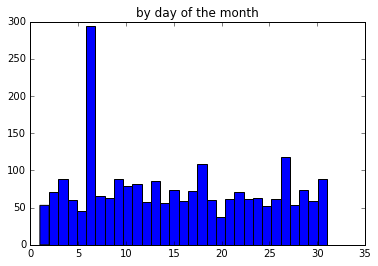

In [18]:
plt.hist([int(item)for item in dateList], bins=31)
plt.title('by day of the month')

as I had mentioned earlier, the 6th of February is my birthday so you can ignore the peak corresponding to the 6th. Ignoring that, my activity is almost constant, other than for two peaks on the 18th and 27th and two dips on the 5th and the 20th of every month. Weird.

In [19]:
sorteditemlist = sorted(dateListDict, key=lambda student:int(student))
sortedDateList = []
for item in sorteditemlist:
    sortedDateList.append(dateListDict[item])

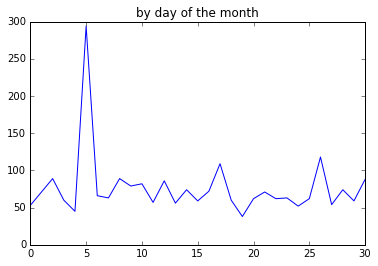

In [20]:
plt.plot(sortedDateList)
plt.title('by day of the month')

While I would loved to go further and look at who commented the most on my posts on Facebook, that information is not available on `wall.htm`. Heck, it doesn't even give me information on who it was that made the comment. Below, you can see a snippet showing what information we have on comments in the `wall.htm` file.

<p>
 <div class="meta">
  Wednesday, February 6, 2013 at 12:01am UTC+05:30
 </div>
 <div class="comment">
  Happy birthday Rahul! Have a good one :)
 </div>
</p>
<p>
 <div class="meta">
  Sunday, February 3, 2013 at 4:28pm UTC+05:30
 </div>
 <div class="comment">
  epic! Srinikethan, you should check this out!
 </div>
</p>
<p>
 <div class="meta">
  Saturday, February 2, 2013 at 5:31pm UTC+05:30
 </div>
 <div class="comment">
  excerpt from the article - &quot;The basic problem can be stated very simply: A student&#039;s grandmother is far more likely to die suddenly just before the student takes an exam, than at any other time of year.&quot; 
This article deserves an Ignobel via Sivaramakrishnan :D...
 </div>
</p>

Alas, this ends here. But there will be more. More datasets where I can find my activity information. GMail. Youtube. Hangouts. Google Fit. Twitter. GitHub.